In [103]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
%matplotlib inline

# Import Statsmodels
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.tsa.base.datetools import dates_from_str

In [104]:
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False   

In [105]:
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

In [106]:
df = pd.read_csv('merge.csv')
df = df.drop(['Unnamed: 0'], axis = 1)
print(df.shape) # (1634, 18)
df.head()

(1634, 18)


,year,month,emd_nm,em_g,BGD_cnt,DEU_cnt,FRA_cnt,KGZ_cnt,LKA_cnt,MMR_cnt,NPL_cnt,PHL_cnt,UKR_cnt,UZB_cnt,ETC_visit_pop_cnt,THA_visit_pop_cnt,배달_cnt,resd
0,2018,1,건입동,45646550,0.0,0.0,0.0,0.0,5896.4,631.6,4668.4,6598.8,0.0,0.0,74071.3,4151.8,585,10662824.5
1,2018,1,남원읍,42437700,0.0,0.0,0.0,0.0,43569.5,4062.4,31322.6,14523.8,0.0,0.0,251894.2,3671.0,265,14994199.2
2,2018,1,노형동,265018400,0.0,0.0,1587.3,0.0,3471.0,2806.0,10325.7,5608.5,0.0,2067.3,195406.1,4151.8,4330,56524049.1
3,2018,1,대륜동,57612600,0.0,1271.6,0.0,0.0,0.0,0.0,0.0,3869.5,0.0,0.0,42498.5,328.4,490,15786335.2
4,2018,1,대정읍,38885550,0.0,0.0,0.0,0.0,55963.3,4930.6,0.0,17855.8,0.0,0.0,33287.9,7799.3,477,17063642.9


In [107]:
df['year'] = df['year'].astype(str)
df['month'] = df['month'].astype(str)

df['date'] = df['year'] + '-' + df['month']

In [108]:
# df['date'] = dates_from_str(df['date'])

In [109]:
df.index = df['date']
df = df.drop(['year', 'month', 'date'], axis = 1)
df.head()

,emd_nm,em_g,BGD_cnt,DEU_cnt,FRA_cnt,KGZ_cnt,LKA_cnt,MMR_cnt,NPL_cnt,PHL_cnt,UKR_cnt,UZB_cnt,ETC_visit_pop_cnt,THA_visit_pop_cnt,배달_cnt,resd
date,,,,,,,,,,,,,,,,
2018-1,건입동,45646550,0.0,0.0,0.0,0.0,5896.4,631.6,4668.4,6598.8,0.0,0.0,74071.3,4151.8,585,10662824.5
2018-1,남원읍,42437700,0.0,0.0,0.0,0.0,43569.5,4062.4,31322.6,14523.8,0.0,0.0,251894.2,3671.0,265,14994199.2
2018-1,노형동,265018400,0.0,0.0,1587.3,0.0,3471.0,2806.0,10325.7,5608.5,0.0,2067.3,195406.1,4151.8,4330,56524049.1
2018-1,대륜동,57612600,0.0,1271.6,0.0,0.0,0.0,0.0,0.0,3869.5,0.0,0.0,42498.5,328.4,490,15786335.2
2018-1,대정읍,38885550,0.0,0.0,0.0,0.0,55963.3,4930.6,0.0,17855.8,0.0,0.0,33287.9,7799.3,477,17063642.9


In [110]:
df2 = df[['emd_nm', 'em_g', 'BGD_cnt', 'DEU_cnt', 'FRA_cnt', 'KGZ_cnt', 'LKA_cnt', 'MMR_cnt', 'NPL_cnt', 'PHL_cnt', 'UKR_cnt', 'UZB_cnt', 'ETC_visit_pop_cnt', 'THA_visit_pop_cnt', '배달_cnt', 'resd']]

In [111]:
df2.head()

,emd_nm,em_g,BGD_cnt,DEU_cnt,FRA_cnt,KGZ_cnt,LKA_cnt,MMR_cnt,NPL_cnt,PHL_cnt,UKR_cnt,UZB_cnt,ETC_visit_pop_cnt,THA_visit_pop_cnt,배달_cnt,resd
date,,,,,,,,,,,,,,,,
2018-1,건입동,45646550,0.0,0.0,0.0,0.0,5896.4,631.6,4668.4,6598.8,0.0,0.0,74071.3,4151.8,585,10662824.5
2018-1,남원읍,42437700,0.0,0.0,0.0,0.0,43569.5,4062.4,31322.6,14523.8,0.0,0.0,251894.2,3671.0,265,14994199.2
2018-1,노형동,265018400,0.0,0.0,1587.3,0.0,3471.0,2806.0,10325.7,5608.5,0.0,2067.3,195406.1,4151.8,4330,56524049.1
2018-1,대륜동,57612600,0.0,1271.6,0.0,0.0,0.0,0.0,0.0,3869.5,0.0,0.0,42498.5,328.4,490,15786335.2
2018-1,대정읍,38885550,0.0,0.0,0.0,0.0,55963.3,4930.6,0.0,17855.8,0.0,0.0,33287.9,7799.3,477,17063642.9


In [112]:
한림읍 = df2[df2['emd_nm']=='한림읍']
애월읍 = df2[df2['emd_nm']=='애월읍']
구좌읍 = df2[df2['emd_nm']=='구좌읍']
조천읍 = df2[df2['emd_nm']=='조천읍']
한경면 = df2[df2['emd_nm']=='한경면']
일도1동 = df2[df2['emd_nm']=='일도1동']
일도2동 = df2[df2['emd_nm']=='일도2동']
이도1동 = df2[df2['emd_nm']=='이도1동']
이도2동 = df2[df2['emd_nm']=='이도2동']
삼도1동 = df2[df2['emd_nm']=='삼도1동']
삼도2동 = df2[df2['emd_nm']=='삼도2동']
용담1동 = df2[df2['emd_nm']=='용담1동']
용담2동 = df2[df2['emd_nm']=='용담2동']
건입동 = df2[df2['emd_nm']=='건입동']
화북동 = df2[df2['emd_nm']=='화북동']
삼양동 = df2[df2['emd_nm']=='삼양동']
봉개동 = df2[df2['emd_nm']=='봉개동']
아라동 = df2[df2['emd_nm']=='아라동']
오라동 = df2[df2['emd_nm']=='오라동']
연동 = df2[df2['emd_nm']=='연동']
노형동 = df2[df2['emd_nm']=='노형동']
외도동 = df2[df2['emd_nm']=='외도동']
이호동 = df2[df2['emd_nm']=='이호동']
도두동 = df2[df2['emd_nm']=='도두동']
대정읍 = df2[df2['emd_nm']=='대정읍']
남원읍 = df2[df2['emd_nm']=='남원읍']
성산읍 = df2[df2['emd_nm']=='성산읍']
안덕면 = df2[df2['emd_nm']=='안덕면']
표선면 = df2[df2['emd_nm']=='표선면']
송산동 = df2[df2['emd_nm']=='송산동']
정방동 = df2[df2['emd_nm']=='정방동']
중앙동 = df2[df2['emd_nm']=='중앙동']
천지동 = df2[df2['emd_nm']=='천지동']
효돈동 = df2[df2['emd_nm']=='효돈동']
영천동 = df2[df2['emd_nm']=='영천동']
동홍동 = df2[df2['emd_nm']=='동홍동']
서홍동 = df2[df2['emd_nm']=='서홍동']
대륜동 = df2[df2['emd_nm']=='대륜동']
대천동 = df2[df2['emd_nm']=='대천동']
중문동 = df2[df2['emd_nm']=='중문동']
예래동 = df2[df2['emd_nm']=='예래동']
알수없음 = df2[df2['emd_nm']=='알수없음']

In [113]:
예래동.head()

,emd_nm,em_g,BGD_cnt,DEU_cnt,FRA_cnt,KGZ_cnt,LKA_cnt,MMR_cnt,NPL_cnt,PHL_cnt,UKR_cnt,UZB_cnt,ETC_visit_pop_cnt,THA_visit_pop_cnt,배달_cnt,resd
date,,,,,,,,,,,,,,,,
2018-1,예래동,12408800,0.0,0.0,0.0,0.0,0.0,4072.1,0.0,0.0,0.0,0.0,112124.0,563.0,145,8272584.3
2018-2,예래동,11120850,0.0,0.0,0.0,0.0,0.0,3745.5,0.0,0.0,0.0,0.0,185594.7,863.6,215,6949690.2
2018-3,예래동,13505550,0.0,0.0,0.0,0.0,0.0,3749.0,561.7,0.0,0.0,0.0,163493.6,9623.9,220,7335464.6
2018-4,예래동,13901900,0.0,0.0,0.0,0.0,0.0,0.0,186.7,0.0,0.0,0.0,203926.2,7680.7,235,8246248.9
2018-5,예래동,14295350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,139.6,195256.5,4001.1,230,8792298.0


In [114]:
예래동 = 예래동[['em_g', 'BGD_cnt', 'DEU_cnt', 'FRA_cnt', 'KGZ_cnt', 'LKA_cnt', 'MMR_cnt', 'NPL_cnt', 'PHL_cnt', 'UKR_cnt', 'UZB_cnt', 'ETC_visit_pop_cnt', 'THA_visit_pop_cnt', '배달_cnt', 'resd']]

In [115]:
예래동.head()

,em_g,BGD_cnt,DEU_cnt,FRA_cnt,KGZ_cnt,LKA_cnt,MMR_cnt,NPL_cnt,PHL_cnt,UKR_cnt,UZB_cnt,ETC_visit_pop_cnt,THA_visit_pop_cnt,배달_cnt,resd
date,,,,,,,,,,,,,,,
2018-1,12408800,0.0,0.0,0.0,0.0,0.0,4072.1,0.0,0.0,0.0,0.0,112124.0,563.0,145,8272584.3
2018-2,11120850,0.0,0.0,0.0,0.0,0.0,3745.5,0.0,0.0,0.0,0.0,185594.7,863.6,215,6949690.2
2018-3,13505550,0.0,0.0,0.0,0.0,0.0,3749.0,561.7,0.0,0.0,0.0,163493.6,9623.9,220,7335464.6
2018-4,13901900,0.0,0.0,0.0,0.0,0.0,0.0,186.7,0.0,0.0,0.0,203926.2,7680.7,235,8246248.9
2018-5,14295350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,139.6,195256.5,4001.1,230,8792298.0


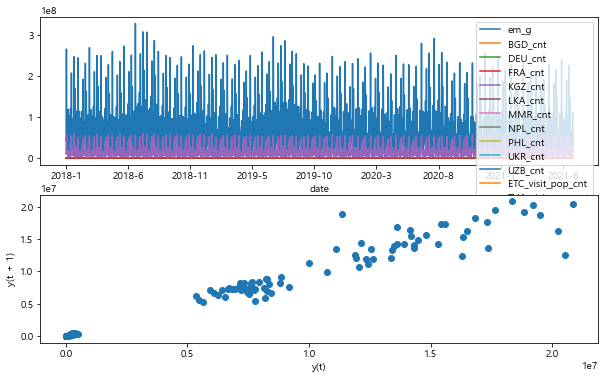

In [116]:
# checking the correlations between X(t) and X(t-1)
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols=1, figsize=(10, 6))
df2.plot(ax = ax1) 
pd.plotting.lag_plot(예래동)
plt.show()

## testing causation granger's casuality test

In [117]:
예래동2 = 예래동[['em_g', 'DEU_cnt', 'FRA_cnt', 'KGZ_cnt', 'LKA_cnt', 'MMR_cnt', 'NPL_cnt', 'PHL_cnt', 'UKR_cnt', 'UZB_cnt', 'ETC_visit_pop_cnt', 'THA_visit_pop_cnt', '배달_cnt', 'resd']]

In [118]:
예래동2.shape

(42, 14)

In [120]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    예래동2 = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in 예래동2.columns:
        for r in 예래동2.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            예래동2.loc[r, c] = min_p_value
    예래동2.columns = [var + '_x' for var in variables]
    예래동2.index = [var + '_y' for var in variables]
    return 예래동2

grangers_causation_matrix(예래동2, variables = 예래동2.columns)   

InfeasibleTestError: The Granger causality test statistic cannot be compute because the VAR has a perfect fit of the data.

In [121]:
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

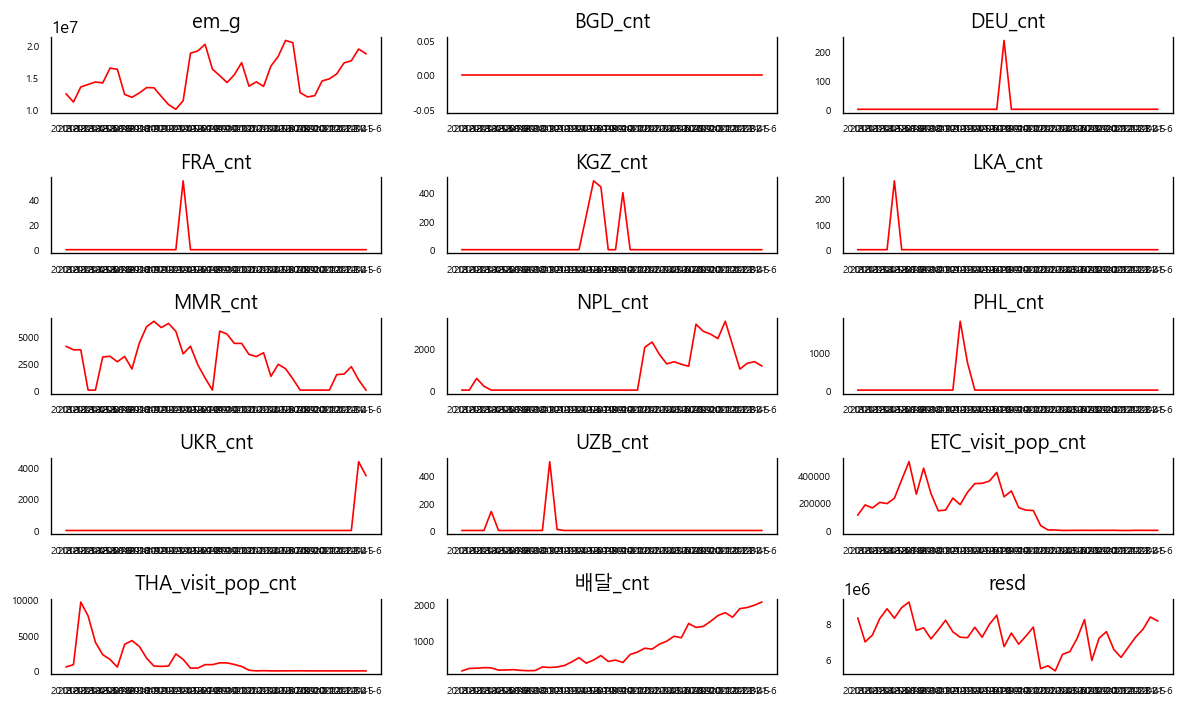

In [124]:
# Plot
fig, axes = plt.subplots(nrows=5, ncols=3, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = 예래동[예래동.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(예래동.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [125]:
nobs = 4
예래동_train, 예래동_test = 예래동[0:-nobs], 예래동[-nobs:]

# Check size
print(예래동_train.shape)  # (38, 15)
print(예래동_test.shape)  # (4, 15)

(38, 15)
(4, 15)


In [126]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [127]:
# ADF Test on each column
for name, column in 예래동_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "em_g" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.0993
 No. Lags Chosen       = 9
 Critical value 1%     = -3.689
 Critical value 5%     = -2.972
 Critical value 10%    = -2.625
 => P-Value = 0.7153. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "BGD_cnt" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = nan
 No. Lags Chosen       = 0
 Critical value 1%     = -3.621
 Critical value 5%     = -2.944
 Critical value 10%    = -2.61
 => P-Value = nan. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "DEU_cnt" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root

C:\Users\Jeong NeulPum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
C:\Users\Jeong NeulPum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
C:\Users\Jeong NeulPum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


### 차분 

In [128]:
예래동_diff = 예래동.diff().dropna()

In [129]:
예래동_diff.head()

,em_g,BGD_cnt,DEU_cnt,FRA_cnt,KGZ_cnt,LKA_cnt,MMR_cnt,NPL_cnt,PHL_cnt,UKR_cnt,UZB_cnt,ETC_visit_pop_cnt,THA_visit_pop_cnt,배달_cnt,resd
date,,,,,,,,,,,,,,,
2018-2,-1287950.0,0.0,0.0,0.0,0.0,0.0,-326.6,0.0,0.0,0.0,0.0,73470.7,300.6,70.0,-1322894.1
2018-3,2384700.0,0.0,0.0,0.0,0.0,0.0,3.5,561.7,0.0,0.0,0.0,-22101.0,8760.3,5.0,385774.4
2018-4,396350.0,0.0,0.0,0.0,0.0,0.0,-3749.0,-375.0,0.0,0.0,0.0,40432.6,-1943.1,15.0,910784.3
2018-5,393450.0,0.0,0.0,0.0,0.0,0.0,0.0,-186.7,0.0,0.0,139.6,-8669.7,-3679.6,-5.0,546049.1
2018-6,-155350.0,0.0,0.0,0.0,0.0,271.5,3073.2,0.0,0.0,0.0,-139.6,38193.3,-1736.4,-65.0,-525941.1


In [130]:
# ADF Test on each column of 1st Differences Dataframe
for name, column in 예래동_diff.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "em_g" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.4346
 No. Lags Chosen       = 8
 Critical value 1%     = -3.654
 Critical value 5%     = -2.957
 Critical value 10%    = -2.618
 => P-Value = 0.0003. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "BGD_cnt" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = nan
 No. Lags Chosen       = 0
 Critical value 1%     = -3.606
 Critical value 5%     = -2.937
 Critical value 10%    = -2.607
 => P-Value = nan. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "DEU_cnt" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Si

C:\Users\Jeong NeulPum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
C:\Users\Jeong NeulPum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


In [131]:
예래동_diff = 예래동_diff.diff().dropna()

In [132]:
# ADF Test on each column of 2nd Differences Dataframe
for name, column in 예래동_diff.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "em_g" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.0297
 No. Lags Chosen       = 9
 Critical value 1%     = -3.67
 Critical value 5%     = -2.964
 Critical value 10%    = -2.621
 => P-Value = 0.0013. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "BGD_cnt" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = nan
 No. Lags Chosen       = 0
 Critical value 1%     = -3.61
 Critical value 5%     = -2.939
 Critical value 10%    = -2.608
 => P-Value = nan. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "DEU_cnt" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Sign

C:\Users\Jeong NeulPum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
C:\Users\Jeong NeulPum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


In [133]:
# 두번째 컬럼 (결측값밖에 없는거) 지우기
예래동_diff = 예래동_diff[['em_g', 'DEU_cnt', 'FRA_cnt', 'KGZ_cnt', 'LKA_cnt', 'MMR_cnt', 'NPL_cnt', 'PHL_cnt', 'UKR_cnt', 'UZB_cnt', 'ETC_visit_pop_cnt', 'THA_visit_pop_cnt', '배달_cnt', 'resd']]

## 공적분 검정 

In [134]:
예래동_diff.shape

(40, 14)

In [135]:
예래동Dirty = 예래동_diff + 0.00001 * np.random.rand(40, 14)

In [136]:
예래동Dirty

,em_g,DEU_cnt,FRA_cnt,KGZ_cnt,LKA_cnt,MMR_cnt,NPL_cnt,PHL_cnt,UKR_cnt,UZB_cnt,ETC_visit_pop_cnt,THA_visit_pop_cnt,배달_cnt,resd
date,,,,,,,,,,,,,,
2018-3,3672650.0,0.0,0.0,0.0,0.0,330.1,561.7,0.0,0.0,0.0,-95571.7,8459.6,-65.0,1708668.5
2018-4,-1988350.0,0.0,0.0,0.0,0.0,-3752.5,-936.6,0.0,0.0,0.0,62533.6,-10703.4,10.0,525010.0
2018-5,-2900.0,0.0,0.0,0.0,0.0,3749.0,188.3,0.0,0.0,139.6,-49102.2,-1736.5,-20.0,-364735.3
2018-6,-548800.0,0.0,0.0,0.0,271.5,3073.2,186.7,0.0,0.0,-279.1,46863.0,1943.2,-60.0,-1071990.2
2018-7,2492400.0,0.0,0.0,0.0,-542.9,-2994.2,0.0,0.0,0.0,139.6,95680.3,1069.5,70.0,1118626.1
2018-8,-2519250.0,0.0,0.0,0.0,271.5,-598.2,0.0,0.0,0.0,0.0,-2153.6,-392.5,5.0,-287471.9
2018-9,-3787800.0,0.0,0.0,0.0,0.0,1018.9,0.0,0.0,0.0,0.0,-367164.9,4232.3,-30.0,-1877707.4
2018-10,3519050.0,0.0,0.0,0.0,0.0,-1667.0,0.0,0.0,0.0,0.0,423779.7,-2649.3,10.0,1715656.9
2018-11,1125800.0,0.0,0.0,0.0,0.0,3566.2,0.0,0.0,0.0,0.0,-371521.3,-1333.3,15.0,-758513.0


In [137]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(예래동Dirty.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(예래동Dirty)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
em_g   ::  3104.06   > nan       =>   False
DEU_cnt ::  2619.14   > nan       =>   False
FRA_cnt ::  2189.55   > 311.1288  =>   True
KGZ_cnt ::  1830.63   > 263.2603  =>   True
LKA_cnt ::  1497.44   > 219.4051  =>   True
MMR_cnt ::  1179.43   > 179.5199  =>   True
NPL_cnt ::  910.2     > 143.6691  =>   True
PHL_cnt ::  674.58    > 111.7797  =>   True
UKR_cnt ::  477.69    > 83.9383   =>   True
UZB_cnt ::  299.06    > 60.0627   =>   True
ETC_visit_pop_cnt ::  177.57    > 40.1749   =>   True
THA_visit_pop_cnt ::  90.41     > 24.2761   =>   True
배달_cnt ::  31.45     > 12.3212   =>   True
resd   ::  12.38     > 4.1296    =>   True


C:\Users\Jeong NeulPum\anaconda3\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:577: HypothesisTestWarning: Critical values are only available for time series with 12 variables at most.
  warnings.warn("Critical values are only available for time series "


In [138]:
model=VAR(예래동Dirty)

C:\Users\Jeong NeulPum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [139]:
pd.options.display.float_format = '{:.1f}'.format

In [140]:
예래동Dirty

,em_g,DEU_cnt,FRA_cnt,KGZ_cnt,LKA_cnt,MMR_cnt,NPL_cnt,PHL_cnt,UKR_cnt,UZB_cnt,ETC_visit_pop_cnt,THA_visit_pop_cnt,배달_cnt,resd
date,,,,,,,,,,,,,,
2018-3,3672650.0,0.0,0.0,0.0,0.0,330.1,561.7,0.0,0.0,0.0,-95571.7,8459.6,-65.0,1708668.5
2018-4,-1988350.0,0.0,0.0,0.0,0.0,-3752.5,-936.6,0.0,0.0,0.0,62533.6,-10703.4,10.0,525010.0
2018-5,-2900.0,0.0,0.0,0.0,0.0,3749.0,188.3,0.0,0.0,139.6,-49102.2,-1736.5,-20.0,-364735.3
2018-6,-548800.0,0.0,0.0,0.0,271.5,3073.2,186.7,0.0,0.0,-279.1,46863.0,1943.2,-60.0,-1071990.2
2018-7,2492400.0,0.0,0.0,0.0,-542.9,-2994.2,0.0,0.0,0.0,139.6,95680.3,1069.5,70.0,1118626.1
2018-8,-2519250.0,0.0,0.0,0.0,271.5,-598.2,0.0,0.0,0.0,0.0,-2153.6,-392.5,5.0,-287471.9
2018-9,-3787800.0,0.0,0.0,0.0,0.0,1018.9,0.0,0.0,0.0,0.0,-367164.9,4232.3,-30.0,-1877707.4
2018-10,3519050.0,0.0,0.0,0.0,0.0,-1667.0,0.0,0.0,0.0,0.0,423779.7,-2649.3,10.0,1715656.9
2018-11,1125800.0,0.0,0.0,0.0,0.0,3566.2,0.0,0.0,0.0,0.0,-371521.3,-1333.3,15.0,-758513.0


In [141]:
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  197.28899634079545
BIC :  206.24663597380123
FPE :  8.611131218736178e+85
HQIC:  200.5029203579145 

Lag Order = 2


LinAlgError: 12-th leading minor of the array is not positive definite

In [142]:
model_fitted = model.fit(7)
model_fitted.summary()

C:\Users\Jeong NeulPum\anaconda3\lib\site-packages\statsmodels\tsa\vector_ar\var_model.py:1450: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params()))


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 07, Sep, 2021
Time:                     12:15:37
--------------------------------------------------------------------
No. of Equations:         14.0000    BIC:                   -521.786
Nobs:                     33.0000    HQIC:                  -563.491
Log likelihood:           10377.0    FPE:               6.73290e-287
AIC:                     -584.639    Det(Omega_mle):    2.50820e-295
--------------------------------------------------------------------
Results for equation em_g
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                       17.068543              NAN              NAN             NAN
L1.em_g                     -0.110432         0.000001      -197473.850           0.000
L1.DEU_cnt                 -32.77

In [143]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = 예래동Dirty.values[-lag_order:]
forecast_input

7


array([[ 2.13550000e+06,  9.15233867e-06,  4.75116097e-06,
         4.42557934e-07,  9.55090870e-06,  1.56279947e-06,
        -7.79048939e+01,  9.92536747e-06,  5.89726509e-06,
         3.39383776e-06,  7.68810110e+02,  3.09070237e+00,
         1.70000034e+01, -1.34528690e+06],
       [-1.99860000e+06,  6.61469869e-06,  7.55401180e-07,
         5.42462185e-06,  6.41004329e-06,  5.20050323e-06,
         1.04632761e+03,  3.20323123e-06,  5.26497140e-06,
         3.32042299e-06, -1.76759769e+03, -1.64279934e+00,
        -7.69999918e+01,  5.40564659e+05],
       [ 4.46800000e+05,  5.95969978e-06,  4.27287395e-06,
         4.30795961e-06,  9.44296649e-06,  1.43765401e+03,
        -1.97401329e+03,  7.61546757e-06,  7.14001139e-07,
         8.70653038e-07,  1.24929590e+03,  5.06505281e-01,
        -2.11999996e+02,  1.01803110e+06],
       [ 9.57550000e+05,  7.64566647e-06,  2.43031464e-06,
         4.77518723e-06,  4.26644815e-06, -1.38489050e+03,
        -1.42088983e+01,  3.15763633e-06,  8.

In [144]:
from glob import glob
glob('*')

['2021 빅콘테스트_데이터분석분야_퓨처스리그_ECO제주_평가데이터_210806_update.xlsx',
 'CARD_SPENDING.CSV',
 'FOOD_WASTE.CSV',
 'jupyter_lab.bat',
 'KOREAN_FINAL.csv',
 'LONG_TERM_FRGN_FINAL.csv',
 'merge.csv',
 'RESIDENT_POP.CSV',
 'shorttermfrgn, foodwaste 2 늘품.ipynb',
 'SHORT_TERM_FRGN_FINAL.csv',
 'Untitled.ipynb',
 'VAR method(2) (1).ipynb',
 'VAR method(2).ipynb',
 'VAR method.ipynb',
 '__pycache__']

In [146]:
!pip install xlrd
!pip install openpyxl
!pip install pandas

In [147]:
forecast = pd.read_excel('2021 빅콘테스트_데이터분석분야_퓨처스리그_ECO제주_평가데이터_210806_update.xlsx')
forecast.to_csv('2021 빅콘테스트_데이터분석분야_퓨처스리그_ECO제주_평가데이터_210806_update.xlsx')

ValueError: File is not a recognized excel file

In [ ]:
forecast.columns = ['NO', '읍면동별 음식물 쓰레기 월 배출량', '7월 배출량(g)', '8월 배출량(9)']

In [ ]:
forecast = forecast.drop(index = [0, 1], axis = 0)

In [ ]:
forecast.set_index('NO', inplace = True)

In [ ]:
forecast

In [148]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=예래동Dirty.index[-nobs:], columns=예래동Dirty.columns + '_2d')
df_forecast

,em_g_2d,DEU_cnt_2d,FRA_cnt_2d,KGZ_cnt_2d,LKA_cnt_2d,MMR_cnt_2d,NPL_cnt_2d,PHL_cnt_2d,UKR_cnt_2d,UZB_cnt_2d,ETC_visit_pop_cnt_2d,THA_visit_pop_cnt_2d,배달_cnt_2d,resd_2d
date,,,,,,,,,,,,,,
2021-3,-3998253.9,-33.2,-9.2,-0.4,-0.0,-77.3,2842.7,-108.3,757.4,-44.5,-2432.5,-457.2,-224.0,-3196059.1
2021-4,4579092.0,33.8,12.9,82.0,0.0,1052.5,-2515.8,-435.5,-567.1,-5.8,-49756.3,302.7,-44.6,3280531.1
2021-5,6422170.4,-25.5,-4.2,-96.8,0.0,-233.4,-1477.9,211.0,794.5,67.2,54723.0,40.0,222.5,1300296.0
2021-6,1150293.1,84.4,-13.5,-30.7,0.0,-173.4,148.4,200.0,-1107.3,-10.6,-107747.7,233.8,123.0,-1377765.2


In [149]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [150]:
예래동_train = 예래동_train[['em_g','DEU_cnt', 'FRA_cnt', 'KGZ_cnt', 'LKA_cnt', 'MMR_cnt', 'NPL_cnt', 'PHL_cnt', 'UKR_cnt', 'UZB_cnt', 'ETC_visit_pop_cnt', 'THA_visit_pop_cnt', '배달_cnt', 'resd']]

In [151]:
예래동_train

,em_g,DEU_cnt,FRA_cnt,KGZ_cnt,LKA_cnt,MMR_cnt,NPL_cnt,PHL_cnt,UKR_cnt,UZB_cnt,ETC_visit_pop_cnt,THA_visit_pop_cnt,배달_cnt,resd
date,,,,,,,,,,,,,,
2018-1,12408800,0.0,0.0,0.0,0.0,4072.1,0.0,0.0,0.0,0.0,112124.0,563.0,145,8272584.3
2018-2,11120850,0.0,0.0,0.0,0.0,3745.5,0.0,0.0,0.0,0.0,185594.7,863.6,215,6949690.2
2018-3,13505550,0.0,0.0,0.0,0.0,3749.0,561.7,0.0,0.0,0.0,163493.6,9623.9,220,7335464.6
2018-4,13901900,0.0,0.0,0.0,0.0,0.0,186.7,0.0,0.0,0.0,203926.2,7680.7,235,8246248.9
2018-5,14295350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,139.6,195256.5,4001.1,230,8792298.0
2018-6,14140000,0.0,0.0,0.0,271.5,3073.2,0.0,0.0,0.0,0.0,233449.8,2264.8,165,8266356.9
2018-7,16477050,0.0,0.0,0.0,0.0,3152.2,0.0,0.0,0.0,0.0,367323.4,1597.9,170,8859041.8
2018-8,16294850,0.0,0.0,0.0,0.0,2632.9,0.0,0.0,0.0,0.0,499043.4,538.5,180,9164254.9
2018-9,12324850,0.0,0.0,0.0,0.0,3132.6,0.0,0.0,0.0,0.0,263598.4,3711.5,160,7591760.6


In [152]:
df_results = invert_transformation(예래동_train, df_forecast, second_diff=True)        

In [153]:
df_results

,em_g_2d,DEU_cnt_2d,FRA_cnt_2d,KGZ_cnt_2d,LKA_cnt_2d,MMR_cnt_2d,NPL_cnt_2d,PHL_cnt_2d,UKR_cnt_2d,UZB_cnt_2d,ETC_visit_pop_cnt_2d,THA_visit_pop_cnt_2d,배달_cnt_2d,resd_2d,em_g_1d,em_g_forecast,DEU_cnt_1d,DEU_cnt_forecast,FRA_cnt_1d,FRA_cnt_forecast,KGZ_cnt_1d,KGZ_cnt_forecast,LKA_cnt_1d,LKA_cnt_forecast,MMR_cnt_1d,MMR_cnt_forecast,NPL_cnt_1d,NPL_cnt_forecast,PHL_cnt_1d,PHL_cnt_forecast,UKR_cnt_1d,UKR_cnt_forecast,UZB_cnt_1d,UZB_cnt_forecast,ETC_visit_pop_cnt_1d,ETC_visit_pop_cnt_forecast,THA_visit_pop_cnt_1d,THA_visit_pop_cnt_forecast,배달_cnt_1d,배달_cnt_forecast,resd_1d,resd_forecast
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-3,-3998253.9,-33.2,-9.2,-0.4,-0.0,-77.3,2842.7,-108.3,757.4,-44.5,-2432.5,-457.2,-224.0,-3196059.1,-3221453.9,12344796.1,-33.2,-33.2,-9.2,-9.2,-0.4,-0.4,-0.0,-0.0,1360.4,2798.0,1701.2,3864.1,-108.3,-108.3,757.4,757.4,-44.5,-44.5,-2526.6,-2246.2,-457.6,-457.3,-353.0,1295.0,-2622592.8,4041842.1
2021-4,4579092.0,33.8,12.9,82.0,0.0,1052.5,-2515.8,-435.5,-567.1,-5.8,-49756.3,302.7,-44.6,3280531.1,1357638.1,13702434.2,0.6,-32.6,3.7,-5.5,81.6,81.2,-0.0,-0.0,2412.8,5210.9,-814.6,3049.5,-543.8,-652.2,190.3,947.8,-50.3,-94.8,-52282.9,-54529.1,-154.9,-612.1,-397.7,897.3,657938.3,4699780.4
2021-5,6422170.4,-25.5,-4.2,-96.8,0.0,-233.4,-1477.9,211.0,794.5,67.2,54723.0,40.0,222.5,1300296.0,7779808.5,21482242.7,-24.9,-57.5,-0.5,-6.0,-15.2,66.0,-0.0,-0.0,2179.5,7390.3,-2292.5,756.9,-332.8,-985.0,984.8,1932.6,16.9,-77.9,2440.1,-52089.0,-114.8,-727.0,-175.1,722.2,1958234.3,6658014.7
2021-6,1150293.1,84.4,-13.5,-30.7,0.0,-173.4,148.4,200.0,-1107.3,-10.6,-107747.7,233.8,123.0,-1377765.2,8930101.7,30412344.4,59.5,2.0,-14.0,-20.0,-45.9,20.1,-0.0,-0.0,2006.1,9396.4,-2144.1,-1387.2,-132.8,-1117.8,-122.4,1810.2,6.3,-71.6,-105307.6,-157396.6,118.9,-608.0,-52.1,670.1,580469.1,7238483.8


In [154]:
df_results.loc[:, ['em_g_forecast', 'DEU_cnt_forecast', 'FRA_cnt_forecast', 'KGZ_cnt_forecast', 'LKA_cnt_forecast',
                   'MMR_cnt_forecast', 'NPL_cnt_forecast', 'PHL_cnt_forecast', 'UKR_cnt_forecast',
                   'UZB_cnt_forecast', 'ETC_visit_pop_cnt_forecast', 'THA_visit_pop_cnt_forecast',
                   '배달_cnt_forecast', 'resd_forecast']]

,em_g_forecast,DEU_cnt_forecast,FRA_cnt_forecast,KGZ_cnt_forecast,LKA_cnt_forecast,MMR_cnt_forecast,NPL_cnt_forecast,PHL_cnt_forecast,UKR_cnt_forecast,UZB_cnt_forecast,ETC_visit_pop_cnt_forecast,THA_visit_pop_cnt_forecast,배달_cnt_forecast,resd_forecast
date,,,,,,,,,,,,,,
2021-3,12344796.1,-33.2,-9.2,-0.4,-0.0,2798.0,3864.1,-108.3,757.4,-44.5,-2246.2,-457.3,1295.0,4041842.1
2021-4,13702434.2,-32.6,-5.5,81.2,-0.0,5210.9,3049.5,-652.2,947.8,-94.8,-54529.1,-612.1,897.3,4699780.4
2021-5,21482242.7,-57.5,-6.0,66.0,-0.0,7390.3,756.9,-985.0,1932.6,-77.9,-52089.0,-727.0,722.2,6658014.7
2021-6,30412344.4,2.0,-20.0,20.1,-0.0,9396.4,-1387.2,-1117.8,1810.2,-71.6,-157396.6,-608.0,670.1,7238483.8


In [160]:
예래동_test = 예래동_test[['em_g', 'DEU_cnt', 'FRA_cnt', 'KGZ_cnt', 'LKA_cnt', 'MMR_cnt', 'NPL_cnt', 'PHL_cnt', 'UKR_cnt', 'UZB_cnt', 'ETC_visit_pop_cnt', 'THA_visit_pop_cnt', '배달_cnt', 'resd']]

In [165]:
예래동 = 예래동[['em_g', 'DEU_cnt', 'FRA_cnt', 'KGZ_cnt', 'LKA_cnt', 'MMR_cnt', 'NPL_cnt', 'PHL_cnt', 'UKR_cnt', 'UZB_cnt', 'ETC_visit_pop_cnt', 'THA_visit_pop_cnt', '배달_cnt', 'resd']]

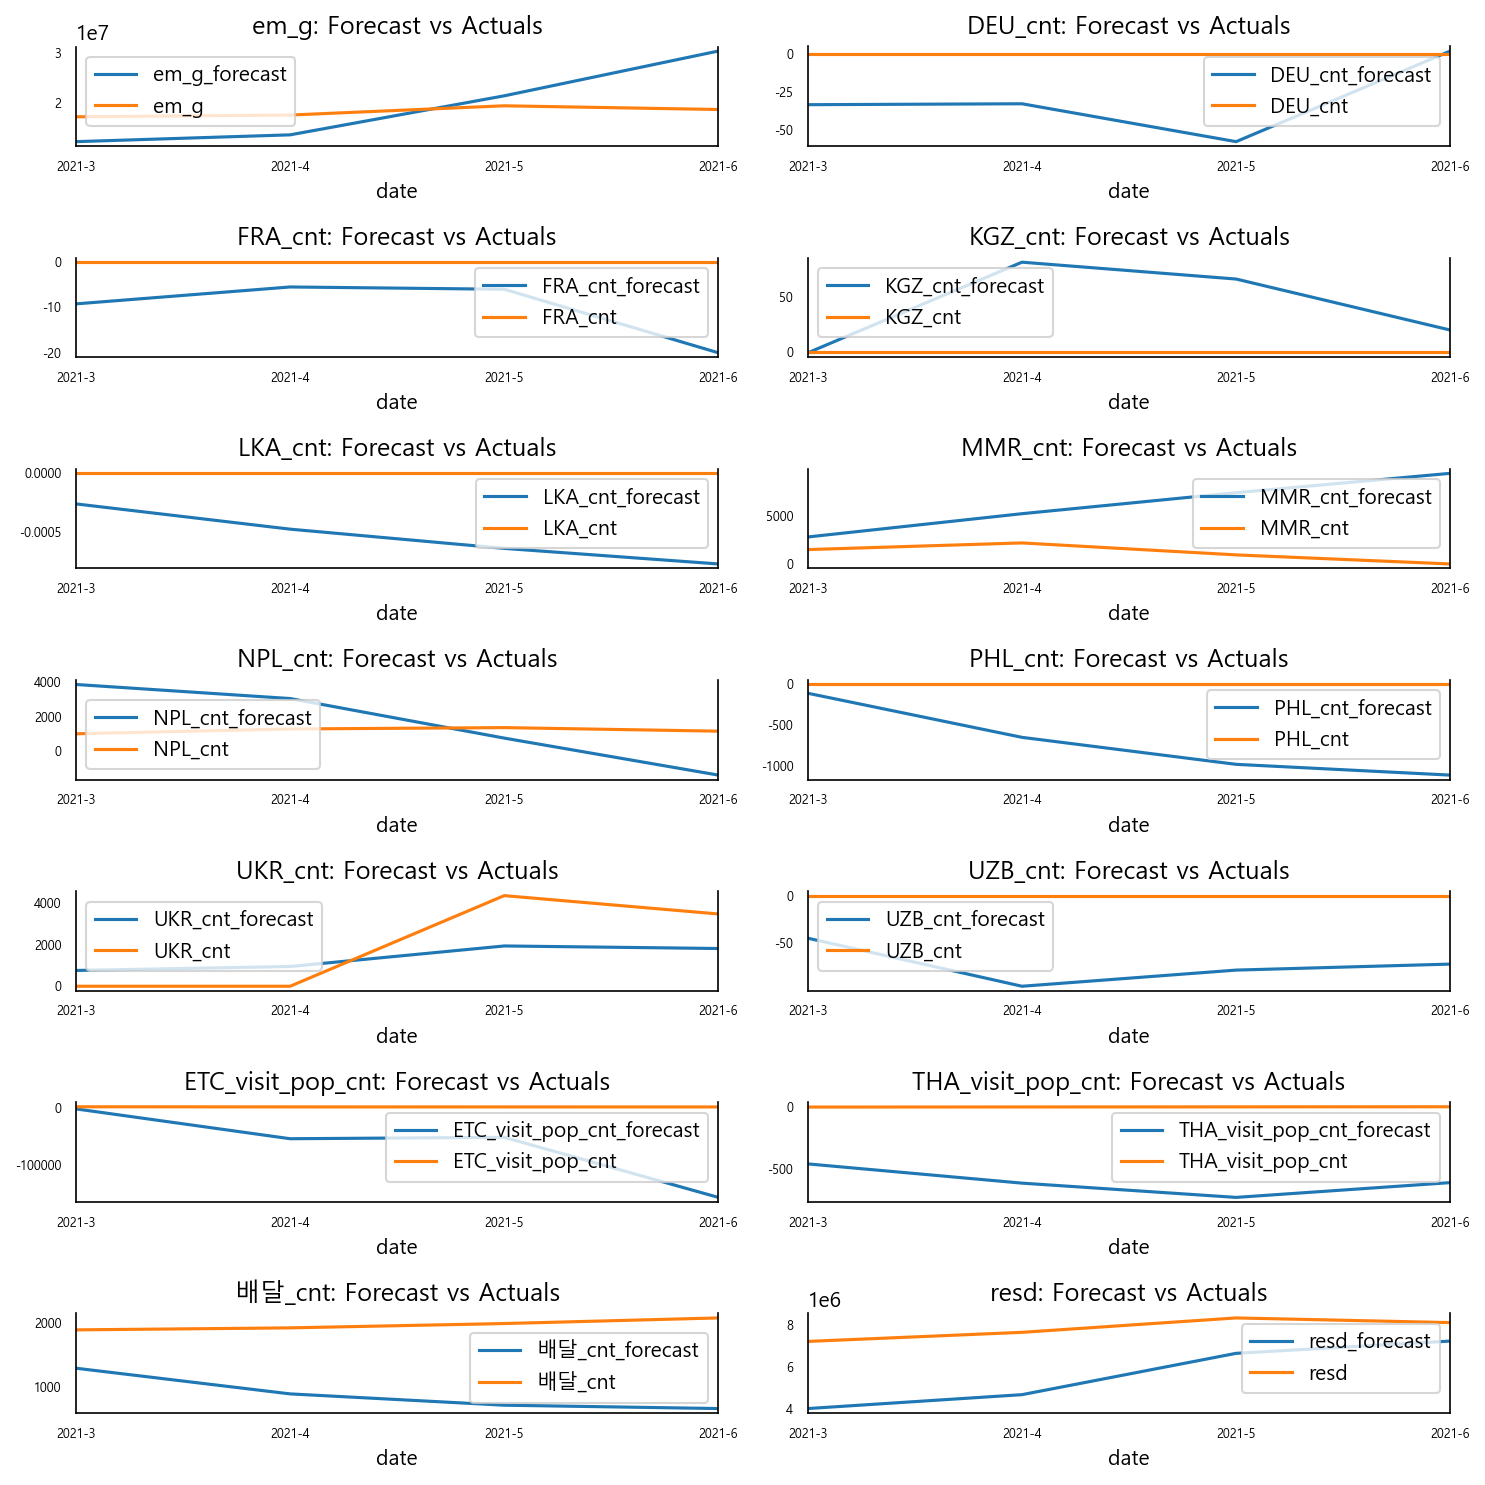

In [166]:
fig, axes = plt.subplots(nrows=int(len(예래동.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(예래동.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    예래동_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [167]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

In [171]:
def adjust(val, length= 6): return str(val).ljust(length)

print('Forecast Accuracy of: em_g')
accuracy_prod = forecast_accuracy(df_results['em_g_forecast'].values, 예래동_test['em_g'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: DEU_cnt')
accuracy_prod = forecast_accuracy(df_results['DEU_cnt_forecast'].values, 예래동_test['DEU_cnt'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: FRA_cnt')
accuracy_prod = forecast_accuracy(df_results['FRA_cnt_forecast'].values, 예래동_test['FRA_cnt'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: KGZ_cnt')
accuracy_prod = forecast_accuracy(df_results['KGZ_cnt_forecast'].values, 예래동_test['KGZ_cnt'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: LKA_cnt')
accuracy_prod = forecast_accuracy(df_results['LKA_cnt_forecast'].values, 예래동_test['LKA_cnt'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: MMR_cnt')
accuracy_prod = forecast_accuracy(df_results['MMR_cnt_forecast'].values, 예래동_test['MMR_cnt'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: NPL_cnt')
accuracy_prod = forecast_accuracy(df_results['NPL_cnt_forecast'].values, 예래동_test['NPL_cnt'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: PHL_cnt')
accuracy_prod = forecast_accuracy(df_results['PHL_cnt_forecast'].values, 예래동_test['PHL_cnt'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))
    
print('\nForecast Accuracy of: UKR_cnt')
accuracy_prod = forecast_accuracy(df_results['UKR_cnt_forecast'].values, 예래동_test['UKR_cnt'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))
    
print('\nForecast Accuracy of: UZB_cnt')
accuracy_prod = forecast_accuracy(df_results['UZB_cnt_forecast'].values, 예래동_test['UZB_cnt'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))
    
    
print('\nForecast Accuracy of: ETC_visit_pop_cnt')
accuracy_prod = forecast_accuracy(df_results['ETC_visit_pop_cnt_forecast'].values, 예래동_test['ETC_visit_pop_cnt'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))
    
    
print('\nForecast Accuracy of: THA_visit_pop_cnt')
accuracy_prod = forecast_accuracy(df_results['THA_visit_pop_cnt_forecast'].values, 예래동_test['THA_visit_pop_cnt'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))
    
    
print('\nForecast Accuracy of: 배달_cnt')
accuracy_prod = forecast_accuracy(df_results['배달_cnt_forecast'].values, 예래동_test['배달_cnt'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))
    
print('\nForecast Accuracy of: resd')
accuracy_prod = forecast_accuracy(df_results['resd_forecast'].values, 예래동_test['resd'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

Forecast Accuracy of: em_g
mape   :  0.3084
me     :  1186566.8221
mae    :  5636676.7026
mpe    :  0.0534
rmse   :  6708216.7061
corr   :  0.724
minmax :  0.2465

Forecast Accuracy of: DEU_cnt
mape   :  inf
me     :  -30.3355
mae    :  31.3401
mpe    :  nan
rmse   :  37.0094
corr   :  nan
minmax :  inf

Forecast Accuracy of: FRA_cnt
mape   :  inf
me     :  -10.1672
mae    :  10.1672
mpe    :  -inf
rmse   :  11.735
corr   :  nan
minmax :  inf

Forecast Accuracy of: KGZ_cnt
mape   :  inf
me     :  41.7274
mae    :  41.9221
mpe    :  nan
rmse   :  53.2783
corr   :  nan
minmax :  inf

Forecast Accuracy of: LKA_cnt
mape   :  inf
me     :  -0.0005
mae    :  0.0005
mpe    :  -inf
rmse   :  0.0006
corr   :  nan
minmax :  inf

Forecast Accuracy of: MMR_cnt
mape   :  inf
me     :  5045.9732
mae    :  5045.9732
mpe    :  inf
rmse   :  5932.5698
corr   :  -0.7779
minmax :  0.7304

Forecast Accuracy of: NPL_cnt
mape   :  1.7128
me     :  366.8539
mae    :  1943.5542
mpe    :  0.3916
rmse   :  2128

<ipython-input-167-4e80452e561c>:13: RuntimeWarning: divide by zero encountered in true_divide
  minmax = 1 - np.mean(mins/maxs)             # minmax
